In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Carregando os dados

In [168]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


### Removendo a coluna "Unnamed: 0" pois ela não contribui para o modelo

In [169]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### Verificando se há registros nulos, os tipos das variáveis e gerando um resumo

In [170]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [171]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [172]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Separando nossa variável independente (x) e a variável independente (y), a qual queremos prever

In [173]:
x = df.YearsExperience.to_numpy()
y = df.Salary.to_numpy()

### Analisando a correlação entre X e Y

In [174]:
np.corrcoef(x, y)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

### Separando em dados de 70% treino e o reste de teste

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.7, random_state=80)

### Convertendo x_train e x_test para 2 dimensões para que seja compatível com nosso modelo

In [176]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

### Criando o modelo e realizando o treinamento

In [177]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Predições com os dados de teste

In [178]:
y_pred = model.predict(x_test)
y_pred

array([ 67939.74805753,  37108.08156155,  64085.78974553,  90100.00835152,
       117077.7165355 ,  92990.47708551, 108406.3103335 ,  55414.38354354,
        55414.38354354])

### Analisando as métricas das previsões

In [179]:
model.score(x_train, y_train)

0.9615409560098889

In [180]:
mean_squared_error(y_test, y_pred)

34703776.64876475

In [181]:
r2_score(y_test, y_pred)

0.9405606408446677

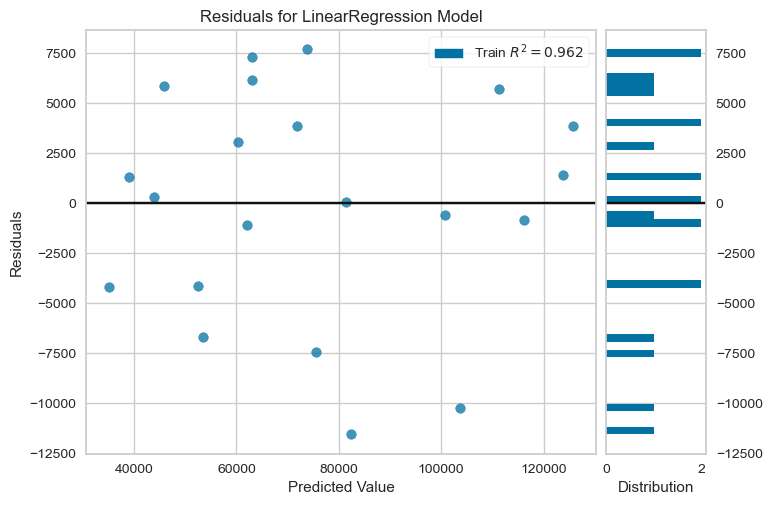

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [182]:
residuals = ResidualsPlot(model)
residuals.fit(x_train, y_train)
residuals.poof()

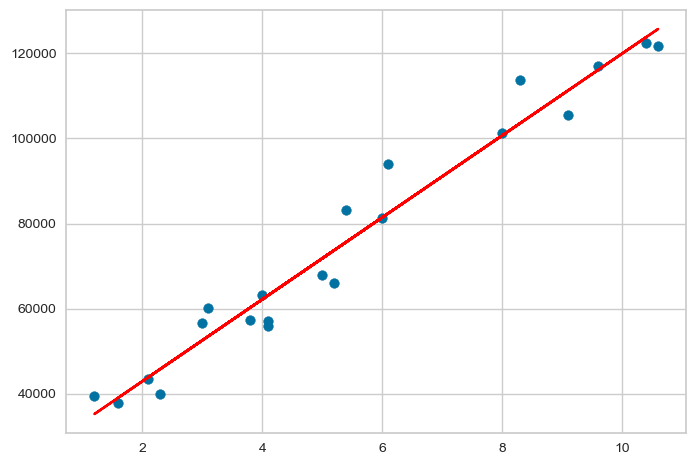

In [184]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()